# Example 5-3: Estimation of acceleration spectra

This example shows the analysis of a time series of accelerations on the Hardanger bridge under excitation from wind loading.

We will estimate the cross-spectral density.




## Import the data

The 10 minutes of data is contained within a txt file. The file contains six signals: 
$x_1(t), y_1(t), z_1(t), x_2(t), y_2(t), z_2(t)$. The sampling rate is 3 Hz.


It's always sensible to plot (at least some of) the data in the time domain to ensure it is correctly formatted.


[[-2.79846460e-04  2.56685102e-03 -3.75651662e-04]
 [-4.99891321e-04  2.16251358e-03 -3.60963714e-03]
 [-3.17204090e-04  1.41540706e-03 -5.13845546e-03]
 [-3.43762347e-04  1.23246481e-03 -4.64083235e-03]
 [-2.44047097e-04  8.86894009e-04 -3.93229963e-03]
 [-4.22995145e-04  1.32224743e-03 -4.86868464e-03]
 [-1.11278774e-04  1.13354068e-03 -3.58522412e-03]
 [ 4.17968102e-05  1.51773374e-03  2.63810409e-03]
 [-2.34727571e-04  1.75128353e-03  4.62711056e-03]
 [-5.04639081e-04  2.24487162e-03  3.06577579e-03]]


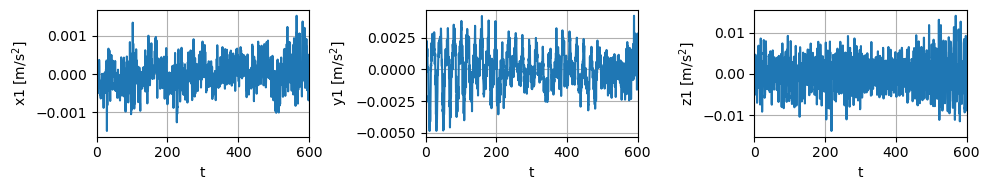

In [10]:
# Import and plot time series

import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy import signal as spsi

# Import data x1, y1, and z1
y_labels=np.loadtxt('data/acc_data.txt',delimiter=',',skiprows=0, max_rows=1, dtype=str, usecols=[0,1,2]) 

y=np.loadtxt('data/acc_data.txt',delimiter=',',skiprows=1, usecols=[0,1,2]).T

ym=np.mean(y,axis=1)
y=y-np.atleast_2d(ym).T # Subtract the mean value

fs=3 # sample rate is 3 Hz
dt=1/fs

print(y[:,0:10].T) # Print first ten rows of data file

t=np.arange(0,y.shape[1]*dt,dt) # make time vector

# Plot time series
fig, axs = plt.subplots(1,3,figsize=(10,2))    
for k1 in range(3):
        ax = axs[k1]
        ax.plot(t,y[k1,:])
        ax.set_ylabel(y_labels[k1] + ' [m/s$^2$]')
        ax.set_xlabel('t')
        ax.grid(True)
        ax.set_xlim(0,600)
plt.tight_layout()


## Welch estimate of cross-spectral density

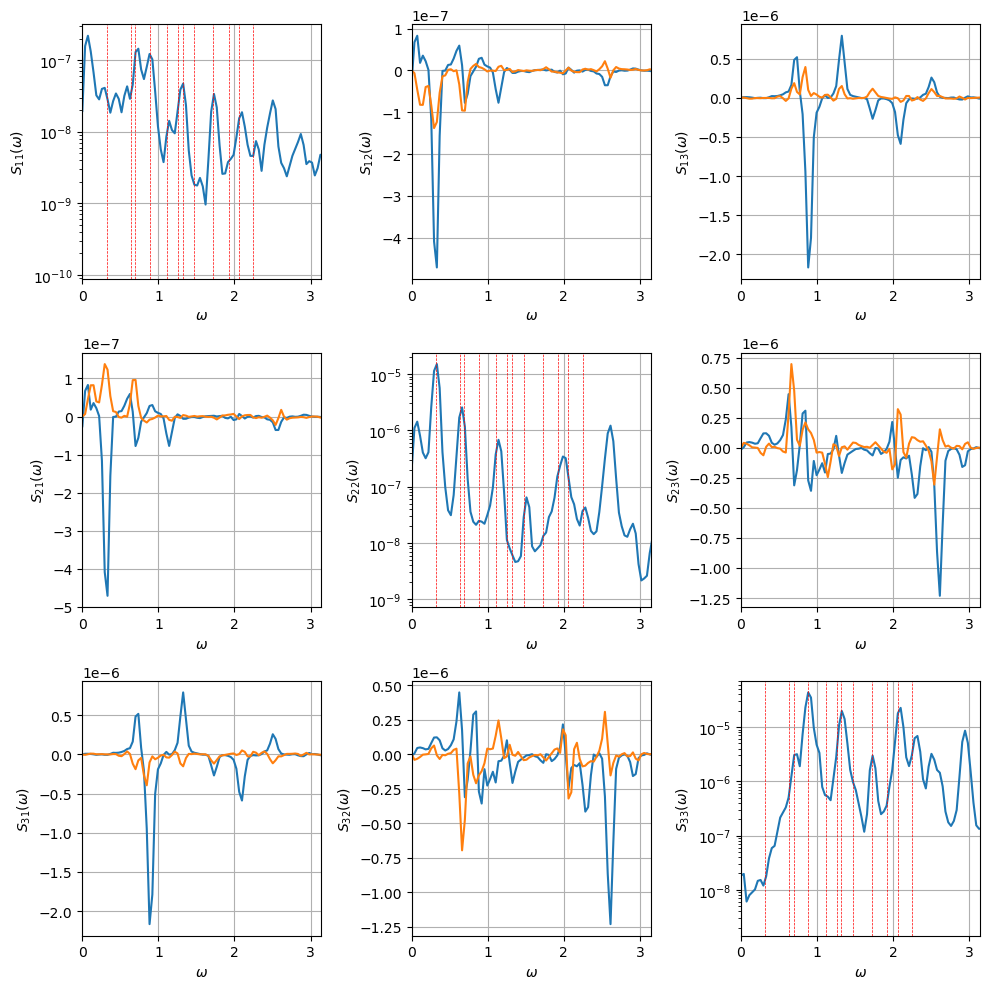

In [13]:
# Welch estimate of cross-spectral density

import scipy

Ndivisions=5 # Number of divisions of the time series
Nwindow=np.ceil(len(t)/Ndivisions) # Length of window
Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2

# Spectral matrix
S_welch=np.zeros((4,4,np.int32(Nfft_pow2/2+1)),dtype=np.complex_)

# Fill spectral matrix by taking the cross spectral density between each of the 3 time series
for k1 in range(3):
    for k2 in range(3):
            f, S_Hz=scipy.signal.csd(y[k1,:],y[k2,:], fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
            
            w_welch=f*2*np.pi # Frequency axis in rad/s
            S_welch[k1,k2,:]=S_Hz/(2*np.pi) # Spectrum in rad/s
            
# Plot spectrum
fig, axs = plt.subplots(3,3,figsize=(10,10))    
for k1 in range(3):
    for k2 in range(3):
        ax = axs[k1,k2]
        ax.plot(w_welch,np.real(S_welch[k1,k2,:]))
        ax.plot(w_welch,np.imag(S_welch[k1,k2,:]))
        ax.set_ylabel(('$S_{' + str(k1+1) + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
        
        if k1==k2:
            ax.set_yscale('log')
        ax.set_xlim(0,0.5*2*np.pi)
plt.tight_layout()


fn_model=np.array([0.051,0.101,0.110,0.141,0.177,0.200,0.210,0.234,0.274,0.306,0.328,0.358]) # frequencies from fe model

# Plot frequencies in spectrum
for k1 in range(3):
        ax = axs[k1,k1]
        for n in range(len(fn_model)):
            ax.axvline(fn_model[n]*2*np.pi,color ='r',linewidth=0.5,linestyle='--')

